##  Back-propagation Implementation

 ## Manjunath Mulinti

1. Implement the sofmax function. 5 pints

2. Implement the Layer class. 10 points.

3. Complete the NN class. 70 points.

    3.1: implement the 'add' function. 5 points
    
    3.2: implement the cross-entropy loss. 5 points 
    
    3.3: implement the forward propagation process. 5 points.
    
    3.4: implement the prediction function. 5 points
    
    3.5: complete 'train' function. 10 points.
    
    3.6: implement the BP algorithm. 30 points
    
    3.7: update all weights and bias. 5 points
    
    3.8: calculate the accuracy. 5 points 
    
4. Evaluation. 15 points.

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [9]:
## load the digits dataset
def load_digits(show_sample = True):
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    
    #show first 100 images
    if show_sample == True:
        nImg = 4
        for i in range(nImg*nImg):
            plt.subplot(nImg, nImg, i+1)
            plt.imshow(x_train[i], cmap = 'Greys_r')
        plt.show()
        
    x_train_1 = np.reshape(x_train, [x_train.shape[0], x_train.shape[1] * x_train.shape[2]])
    x_test_1 = np.reshape(x_test, [x_test.shape[0], x_test.shape[1] * x_test.shape[2]])
    
    return x_train_1, y_train, x_test_1, y_test

# x_train, y_train, x_test, y_test = load_wine()

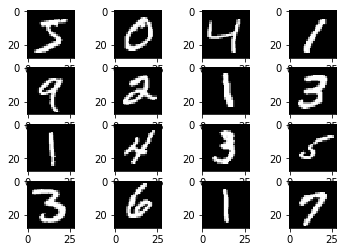

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10000, 784)


In [10]:
x_train_1, y_train, x_test_1, y_test = load_digits(show_sample = True)
print(x_train_1)
print(x_test_1)
print(x_test_1.shape)

In [11]:
## Task 1: Activation functions: implement the softmax function. 5 points
def sigm(z):
    return 1/(1 + np.exp(-z))

def dsigm(z):
    return sigm(z)*(1 - sigm(z))

def softmax(z):
     
    ez = np.exp(z-np.max(z, axis = 1, keepdims = True))
    return ez/np.sum(ez, axis =1, keepdims = True)
    ''' softmax function for the output layer

        z: is a vector
    '''
def dsoftmax(softmax):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)
     

In [15]:
## Task 2: create the layer class. 10 points
class Layer:
    """ Regular densely-connected NN layer   
    """
    
    def __init__(self, units, input_dim, activation = None): # 5 points
        '''initialize weights and bias
            
            units: the number of hidden nodes
        '''
        self.units = units
        self.activation = activation
        self.input_dim = input_dim
        
        np.random.seed(0)
        self.W = np.random.randn(units,input_dim) *0.01
        self.bias = np.zeros(shape = (units,1))
        #m = self.output.shape[1]
        self.gW = np.zeros((units,input_dim)) # gradient of wights
        self.gb = np.zeros((units,1))# gradient of bias
        
    def run(self, inputs): # 5 points
        ''' calculate the net input and activation output of the current layer
        
            inputs=(n_sample * n_features)
          
            return the activation output
        '''
        self.net = np.dot(inputs,self.W.T) +self.bias.T 
        
        if self.activation is 'sigm':
            self.output = sigm(self.net)
            
        if self.activation is 'softmax':
            self.output = softmax(self.net)
            
        return self.output

In [30]:
## Task 3: complete the following NN class. 60 points
class NeuralNetwork:
    
    def __init__(self):
        self.layers=[]
        
    # Task 3.1: implement the 'add' function. 5 points     
    def add(self, units, input_dim, activation = 'sigm'):
        '''add one layer to neural network
            
            units: the number of nodes of current layer
            input_dim: input dimension (the number of nodes of the previous layer)
            activation: the name of the activation function
        '''
        
        layer = Layer(units,input_dim,activation = 'sigm') 
        self.layers.append(layer)
        
        
        
    # Task 3.2: implement the cross-entropy loss. 5 points   
    def loss(self, y_pred, y):
        '''loss function: 1/n_samples*sum_samples(sum_output(-y_i*log(y_pred_i)))
        
            y_pred: predictions(n_samples * 10)
            y: target(one-hot vectors: n_samples * 10)
        '''
        
        m = y.shape[0] # the number of samples
        
        loss = (1/m)*np.sum(np.sum(-y*np.log(y_pred),axis = 0))
        loss = np.squeeze(loss)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
        assert(isinstance(loss, float))
        return loss
        
      
    # Task 3.3: implement the forward propagation process. 5 points.
    def forward_prop(self, inputs):
        '''forward propagation calculates net input and output for each layer
        
            inputs: input data(n_samples * n_features)
            return the output of the last layer
            
        '''
        
        nLayers = len(self.layers)
        
        for i in range(nLayers):
            out = self.layers[i].run(inputs)
            inputs = out
            #
            #
            
        return out
    
    # Task 3.4: implement the prediction function. 5 points
    def predict_class(self, x):
        '''predict class lables (0, 1, 2, 3, ..., 9) for data samples
        
            x: input(n_samples * n_features) 
            return class labels
        '''
        out = self.forward_prop(x) 
        return np.argmax(out,axis =1) # output decoding
        
        #y_pred = self.forward_prop(x)
        #class_labels = np.round(y_pred)
        #return class_labels

    # Task 3.5: complete the following 'train' function. 10 points.
    def train(self, inputs, targets, lr = 0.001, batch_size = 32, epochs = 50):
        '''implement the SGD process and use Back-Propagation algorithm to calculate gradients 
        
            inputs: training samples
            targets: training targets
            lr: learning rate
            batch_size: batch size
            epochs: max number of epochs
        '''
        
        m = len(targets)  
        #print(m, targets.shape)
        loss_hist = np.zeros(epochs)
        
        for i in range(epochs):
            #shuffle the data
            idx = np.arange(m)
            np.random.shuffle(idx)
            inputs = inputs[idx]
            targets = targets[idx]
            
            for b in range(int(m/batch_size)):
                b_start= b*batch_size
                b_end = min((b+1)*batch_size, m)
                
                x_batch = inputs[b_start:b_end, :]
                y_batch = targets[b_start:b_end, :]
                out = self.forward_prop(x_batch)
                gradient = self.BP(x_batch,y_batch)
                update_weights = self.updateWeights(lr)
                
                
                # 1. run forward propagation
                
                # 2. call BP to calculate all gradients
               
                # 3.update_weights = self.updateWeights(lr) update all weights and bias
                
            lr = lr*0.9
            
                
                
             
            # 4. calculate and record the loss of current epoch
            #
            #loss_hist[i] = 
            
            # 5. print out the loss of current epoch
            #
            y_pred = self.forward_prop(inputs)
            loss_hist[i] = self.loss(y_pred, targets)
            print('epoch:', i, loss_hist[i])

            
        return loss_hist ,gradient
    
   
    # Task 3.6: implement the BP algorithm. 30 points
    def BP(self, x, y):
        ''' Back-propagation algorithm
        
            x: input samples (n_samples * n_features)
            y: ont-hot targets (n_samples * 10)
        '''
        
        nLayers = len(self.layers)
        m_batch = x.shape[0]
        
        idx = nLayers - 1
        h = self.layers[idx-1].output
        #print(h.shape)
        net = self.layers[idx].net
        o= self.layers[idx].output
        # 1. calculate gradients for the hidden-to-output layer. 15 points
        # idx >= 1
        t = o -y
        #print(t.shape)
        self.layers[idx].gW = (1 / m_batch) * np.dot(t.T,h)
        #print( self.layers[idx].W.shape)
        self.layers[idx].gb = (1 / m_batch) * np.sum(t, axis=1, keepdims=True)
        delta   = (np.dot( t,self.layers[idx].W) *dsigm(h))
        
        #net = 
        #o = 

        
        # 2. calculate gradients for the input-to-hidden layers. 15 points
        
        self.layers[idx-1].gW = (1 / m_batch) * np.dot(delta.T,x)
        #print(self.layers[idx-1].gW.shape)
        self.layers[idx-1].gb = (1 / m_batch) * np.sum(delta, axis=1, keepdims=True)
        self.layers[idx-1].gb = np.reshape(50,1)
        
        #print( self.layers[idx-1].gb.shape)
       
        
        return
        
            
    # Task 3.7: update all weights and bias. 5 points            
    def updateWeights(self, lr):
        nLayers = len(self.layers)
        for i in range(nLayers):
            self.layers[i].W = self.layers[i].W - lr* self.layers[i].gW
            self.layers[i].bias  = self.layers[i].bias - lr * self.layers[i].gb
            
            #self.layers[i].W  =
            #self.layers[i].bias =  
            
    # Task 3.8: calculate the accuracy. 5 points           
    def Acc(self, y, y_pred):
        '''accuracy
            
            y: target: categorical values (0, 1, ...9). n_samples * 1
            y_pred: prediction: 0,1,2, ..9. n_samples *1
        '''
        
        train_acc = (np.sum(y_pred == y)) / len(y)
        print('Training accuracy: %.2f%%' % (train_acc * 100))

       
        return train_acc
        #   

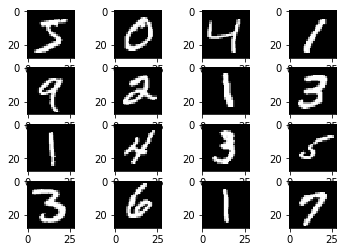

epoch: 0 0.7998198876932667
epoch: 1 0.7325565293381838
epoch: 2 0.7092285822509462
epoch: 3 0.7052850013507421
epoch: 4 0.7006966951360498
epoch: 5 0.7090984867293376
epoch: 6 0.7119052620771646
epoch: 7 0.7110643019541943
epoch: 8 0.7087897906849975
epoch: 9 0.7075787200529275


(array([0.79981989, 0.73255653, 0.70922858, 0.705285  , 0.7006967 ,
        0.70909849, 0.71190526, 0.7110643 , 0.70878979, 0.70757872]), None)

In [31]:
# Task 4: Evaluation. 15 points
   
# 1. create a one-hidden layer NN. 
#    The hidden layer activation is sigmoid and the outputlayer activation is the softmax. 
#    5 points
x_train, y_train, x_test, y_test = load_digits(show_sample = True)
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)
nn = NeuralNetwork()
nn.add(50, x_train.shape[1], 'sigm')
nn.add(10, 50, 'softmax')



nn.train(x_train, y_train_onehot, lr = 0.001, batch_size = 1, epochs = 10)


In [32]:
ten = nn.predict_class(x_train)
temp = nn.Acc(y_train,ten)

Training accuracy: 78.65%


In [33]:
tem1 = nn.predict_class(x_test)
temp2 = nn.Acc(tem1,y_test)

Training accuracy: 79.00%
